In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [12]:
conn = sqlite3.connect("../db.sqlite3")

query = """
SELECT 
    restaurant_order.datetime,
    restaurant_product.name AS product_name,
    restaurant_product.price,
    restaurant_orderitem.quantity
FROM 
    restaurant_orderitem
JOIN 
    restaurant_order ON restaurant_orderitem.order_id = restaurant_order.id
JOIN 
    restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id
"""

df = pd.read_sql_query(query, conn)

conn.close()

df.

,datetime,product_name,price,quantity
0,2019-08-03 20:25:00,Plain Papadum,0.80,2
1,2019-08-03 20:25:00,King Prawn Balti,12.95,1
2,2019-08-03 20:25:00,Garlic Naan,2.95,1
3,2019-08-03 20:25:00,Mushroom Rice,3.95,1
4,2019-08-03 20:25:00,Paneer Tikka Masala,8.95,1
...,...,...,...,...
74813,2016-05-18 18:53:00,House Red wine 75cl,17.95,2
74814,2016-05-14 19:28:00,House Red wine 75cl,17.95,2
74815,2016-05-10 13:18:00,House Red wine 75cl,17.95,2
74816,2016-04-07 19:04:00,House white wine 75cl,17.95,1


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

                 product_name  quantity
0                  Aloo Chaat       316
1                   Aloo Gobi       620
2                  Aloo Methi        44
3          Baingan Hari Mirch       199
4         Bengal Fish Biryani        45
..                        ...       ...
243  Vindaloo - Chicken Tikka        17
244     Vindaloo - King Prawn        23
245           Vindaloo - Lamb        55
246          Vindaloo - Prawn        10
247            Vindaloo Sauce        93

[248 rows x 2 columns]


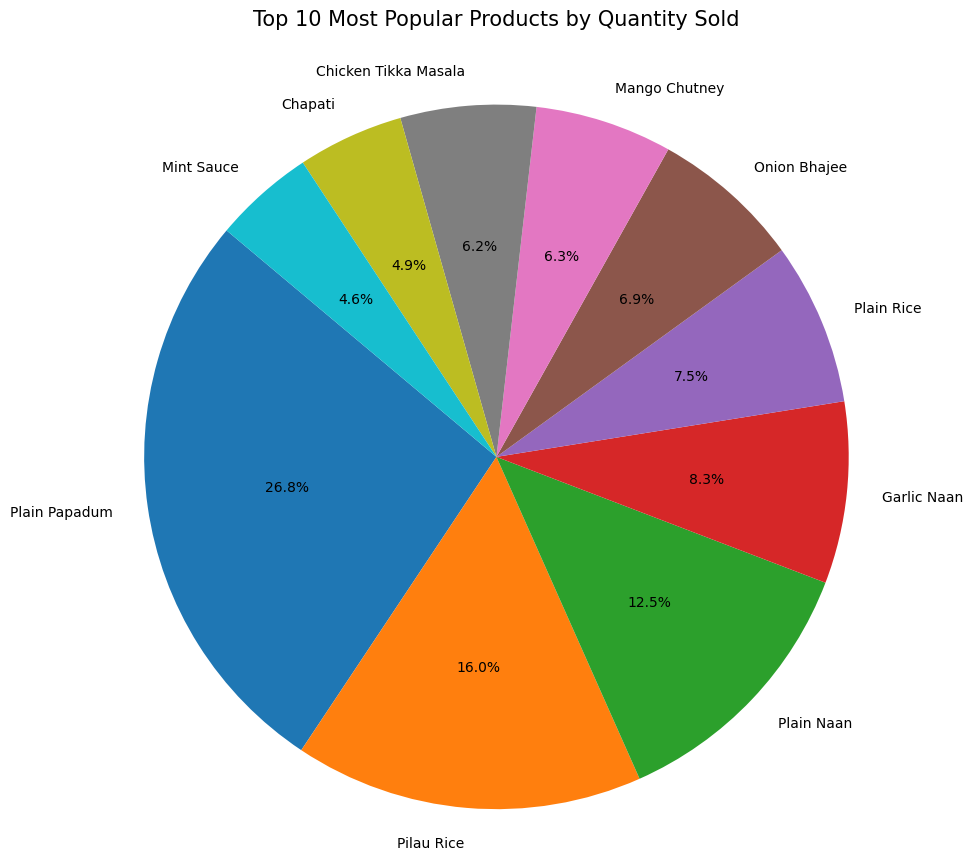

In [25]:
product_sales = df.groupby("product_name")["quantity"].sum().reset_index()
print(product_sales)
product_sales = product_sales.sort_values(by="quantity", ascending=False)
top_10_products = product_sales.head(10)

plt.figure(figsize=(10, 10))
plt.pie(top_10_products["quantity"], labels=top_10_products["product_name"], autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Most Popular Products by Quantity Sold",fontsize=15, y = 1.05)
plt.axis("equal")

plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

             product_name  item_price
52   Chicken Tikka Masala    22133.35
186            Pilau Rice    18782.65
187            Plain Naan    12955.80
97                  Korma    12261.50
16            Bombay Aloo    10894.45
165          Onion Bhajee    10858.55
20         Butter Chicken    10626.60
81            Garlic Naan     9788.10
98        Korma - Chicken     9764.45
189            Plain Rice     8743.80


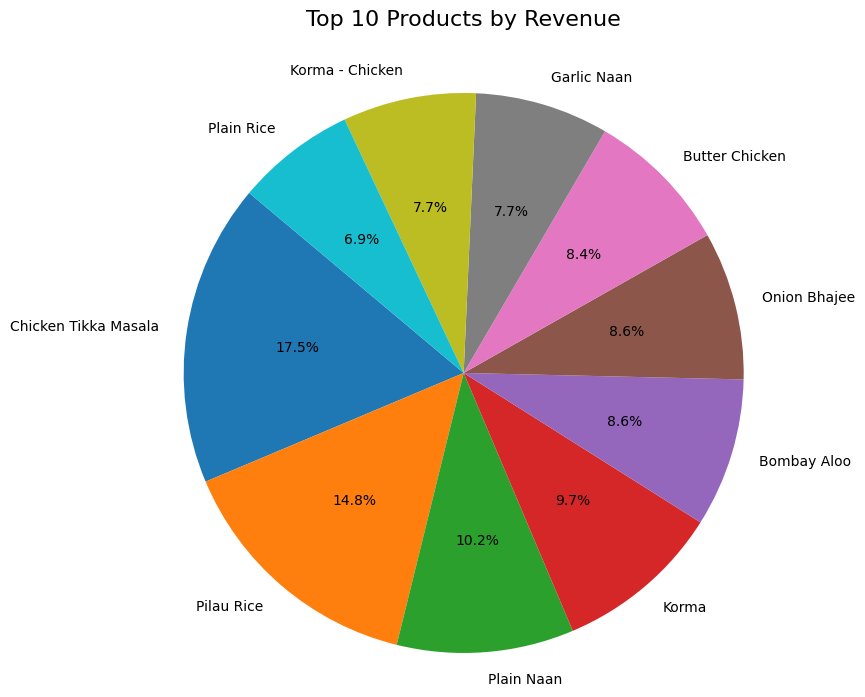

In [21]:
df["item_price"] = df["price"] * df["quantity"]

product_revenue = df.groupby("product_name")["item_price"].sum().reset_index()
product_revenue = product_revenue.sort_values(by="item_price", ascending=False)

top_10_revenue_products = product_revenue.head(10)

print(top_10_revenue_products)

plt.figure(figsize=(10, 8))
plt.pie(top_10_revenue_products["item_price"], labels=top_10_revenue_products["product_name"], autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Products by Revenue", fontsize=16, y=1.05) 
plt.axis("equal") 

plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

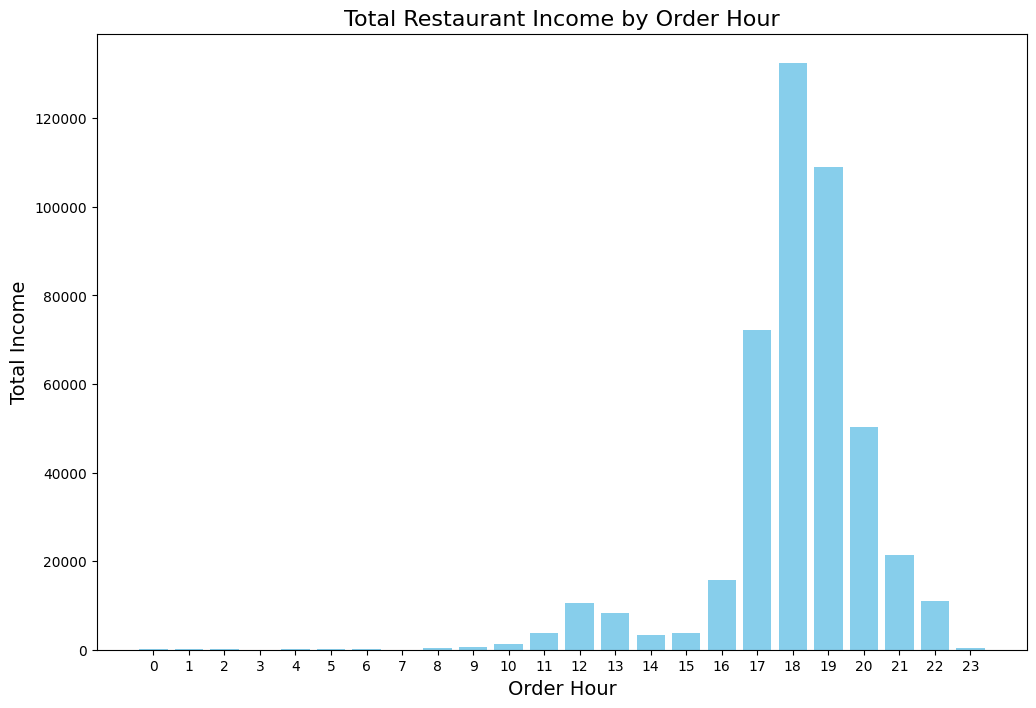

In [23]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["order_hour"] = df["datetime"].dt.hour
df["item_price"] = df["price"] * df["quantity"]

hourly_income = df.groupby("order_hour")["item_price"].sum().reset_index()
hourly_income = hourly_income.sort_values(by="order_hour")


plt.figure(figsize=(12, 8))
plt.bar(hourly_income["order_hour"], hourly_income["item_price"], color="skyblue")
plt.title("Total Restaurant Income by Order Hour", fontsize=16)
plt.xlabel("Order Hour", fontsize=14)
plt.ylabel("Total Income", fontsize=14)
plt.xticks(range(24))

plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

  order_day_of_week  item_price
0            Monday    40008.30
1           Tuesday    38145.65
2         Wednesday    41246.20
3          Thursday    46021.55
4            Friday   100339.15
5          Saturday   112191.65
6            Sunday    67105.95


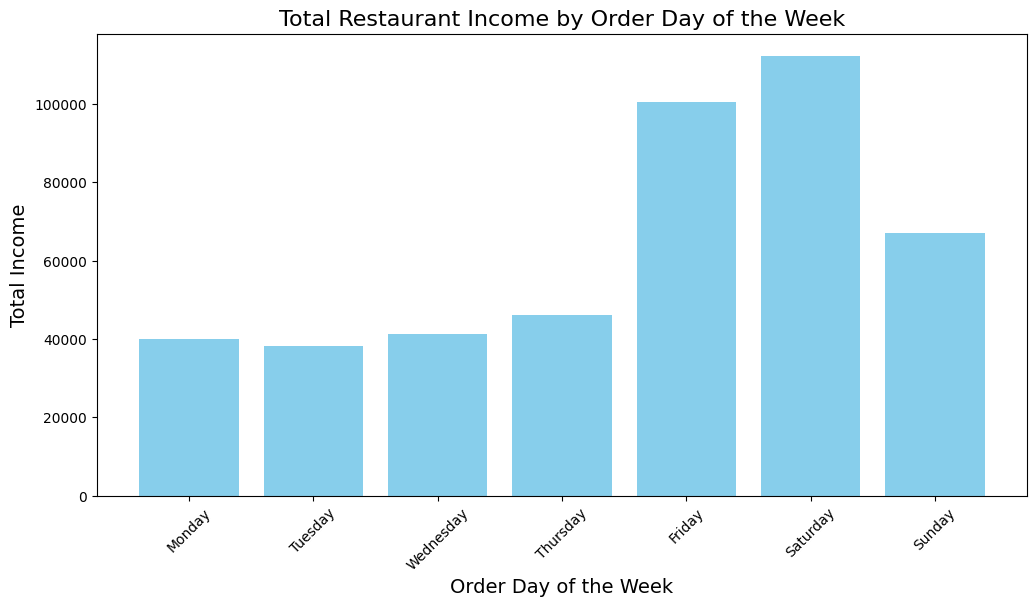

In [24]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["order_day_of_week"] = df["datetime"].dt.dayofweek
df["item_price"] = df["price"] * df["quantity"]

weekly_income = df.groupby("order_day_of_week")["item_price"].sum().reset_index()
weekly_income = weekly_income.sort_values(by="order_day_of_week")

day_map = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
weekly_income["order_day_of_week"] = weekly_income["order_day_of_week"].map(day_map)


plt.figure(figsize=(12, 6))
plt.bar(weekly_income["order_day_of_week"], weekly_income["item_price"], color="skyblue")
plt.title("Total Restaurant Income by Order Day of the Week", fontsize=16)
plt.xlabel("Order Day of the Week", fontsize=14)
plt.ylabel("Total Income", fontsize=14)
plt.xticks(rotation=45) 

plt.show()